# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affair             6366 non-null int64
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [5]:
X = pd.get_dummies(data[['rate_marriage','religious','educ','occupation','occupation_husb']], columns = ['rate_marriage','religious','educ','occupation','occupation_husb'])

In [6]:
X.head()

,rate_marriage_1.0,rate_marriage_2.0,rate_marriage_3.0,rate_marriage_4.0,rate_marriage_5.0,religious_1.0,religious_2.0,religious_3.0,religious_4.0,educ_9.0,...,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [7]:
Y = data['affair']

In [8]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [10]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [11]:
predictions = model.predict_proba(X_test)

In [12]:
for line in zip( predictions[:, 1], Y_test ):
    print( line )

(0.6908511005714757, 0)
(0.08213155880258326, 0)
(0.30150349330489307, 0)
(0.14055331832671186, 0)
(0.332667967104502, 1)
(0.1066282126395346, 0)
(0.24529454817187962, 0)
(0.28694328885894166, 0)
(0.6586549518561317, 1)
(0.19313707982229514, 0)
(0.1134665098948803, 0)
(0.15663494717923895, 0)
(0.1134665098948803, 0)
(0.4324838492078107, 0)
(0.7540336485676364, 1)
(0.41571151096694964, 0)
(0.270921914302358, 0)
(0.6855319496482754, 1)
(0.23209150285011101, 0)
(0.13482262561595537, 0)
(0.21463928591387288, 1)
(0.41467529443060935, 1)
(0.1204492412158247, 1)
(0.44615126459409743, 1)
(0.26949242954585884, 0)
(0.1399508067835782, 0)
(0.4662288510641146, 0)
(0.26949242954585884, 0)
(0.36245881224292026, 0)
(0.0873070475077286, 0)
(0.18310265591925182, 0)
(0.36245881224292026, 1)
(0.22578981093192604, 0)
(0.641624723080109, 1)
(0.5337970538481235, 1)
(0.5337970538481235, 1)
(0.18802334475226046, 0)
(0.20866155763376967, 0)
(0.23481595717147963, 1)
(0.18996969839274694, 0)
(0.5454406503112684,

(0.36420409830806744, 0)
(0.4693512241697109, 1)
(0.652173933915635, 1)
(0.10943669883107031, 0)
(0.1677629877792153, 0)
(0.13962901682914078, 0)
(0.23050731120442478, 0)
(0.42034955122971257, 0)
(0.22758273553907776, 1)
(0.18310265591925182, 1)
(0.08813918798558044, 0)
(0.2510908747680021, 0)
(0.14055331832671186, 0)
(0.1826004630242424, 0)
(0.35585391336140354, 0)
(0.3482916102857199, 0)
(0.18926858041867736, 0)
(0.4424986512807892, 0)
(0.16042021454323946, 0)
(0.33241709098209127, 0)
(0.31014278452810246, 0)
(0.17352207906715164, 0)
(0.20618525100125393, 0)
(0.20709063770509123, 0)
(0.33434503403241966, 1)
(0.45547662284455953, 1)
(0.6148473640187271, 1)
(0.18310265591925182, 0)
(0.332667967104502, 0)
(0.5760890363589908, 0)
(0.6914909042872387, 1)
(0.21463928591387288, 0)
(0.32534952169767967, 0)
(0.22491753633153028, 0)
(0.5337970538481235, 1)
(0.31014278452810246, 0)
(0.10917616379516651, 0)
(0.20910377465747712, 0)
(0.2802083775643093, 1)
(0.4623634059520555, 1)
(0.2839696783272

In [13]:
model.score(X_test, Y_test)

0.7146596858638743

### Упражнение

Постройте набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [15]:
for i in range(1,10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model.fit(X_train, Y_train)
    a = model.score(X_test, Y_test)
    result = {i : a}
    print(result)
    
    

{1: 0.7240837696335078}
{2: 0.7109947643979058}
{3: 0.7172774869109948}
{4: 0.7104712041884816}
{5: 0.7293193717277487}
{6: 0.7094240837696335}
{7: 0.7261780104712042}
{8: 0.7109947643979058}
{9: 0.7136125654450262}


### Оценка качества модели

Считаем accuracy последней модели

In [ ]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [ ]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

In [ ]:
precision = tp / (tp + fp)
precision

### Используем готовые библиотеки

In [16]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [17]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [18]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.3086225026288118, 1.0, 0.06983515661662841)
(0.30842105263157893, 0.9982964224872232, 0.07005658652578209)
(0.3080568720379147, 0.9965928449744463, 0.072019594051863)
(0.3080168776371308, 0.9948892674616695, 0.07252546867721921)
(0.30834213305174235, 0.9948892674616695, 0.0735635669644988)
(0.308994708994709, 0.9948892674616695, 0.07374615247649455)
(0.3091582848067761, 0.9948892674616695, 0.07657472734104798)
(0.3091198303287381, 0.9931856899488927, 0.07892056139300363)
(0.30875331564986735, 0.9914821124361158, 0.08156457292910406)
(0.3089171974522293, 0.9914821124361158, 0.08176651617754781)
(0.3090812533191715, 0.9914821124361158, 0.08213155880258326)
(0.3094098883572568, 0.9914821124361158, 0.08349936776839566)
(0.30957446808510636, 0.9914821124361158, 0.08573173168442959)
(0.3098666666666667, 0.989778534923339, 0.0873070475077286)
(0.3094983991462113, 0.9880749574105622, 0.08792434992292117)
(0.30912973838761343, 0.9863713798977853, 0.08801662525911676)
(0.3087606837606838, 0.9

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


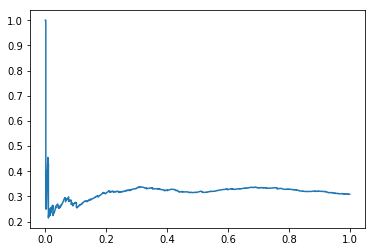

In [20]:
plt.plot( re, pr )

In [21]:
from sklearn.metrics import average_precision_score

In [22]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.3178207519416817

### ROC

In [32]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [33]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [34]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.3871843504724235)
(0.4604758250191865, 0.6869851729818781, 0.3871843504724235)
(0.5341519570222564, 0.7825370675453048, 0.3851590386072859)
(0.7352264006139677, 0.8929159802306426, 0.28149707338406854)
(1.0, 1.0, 0.27977220850951806)


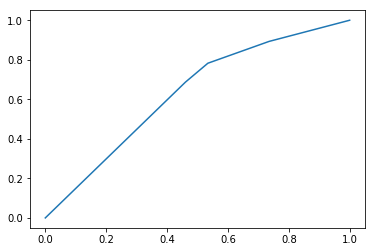

In [35]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [36]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

KeyError: "None of [Index(['age', 'children'], dtype='object')] are in the [columns]"

In [37]:
model2 = LogisticRegression()

In [38]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [39]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
predictions2 = model2.predict_proba( X_test_short )

In [41]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

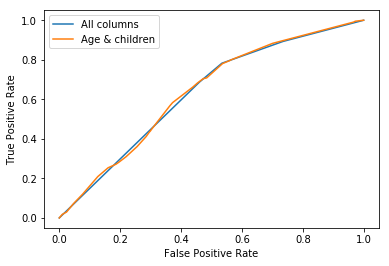

In [42]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
roc_auc_score( Y_test, predictions[:, 1] )

0.6313468728229494

In [31]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6341897610507246

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [ ]:
from sklearn.metrics import auc

In [ ]:
auc( fpr, tpr )

In [ ]:
auc( fpr2, tpr2 )

## Пример влияния L1 и L2-регуляризации

In [43]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [44]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [45]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001 ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [46]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

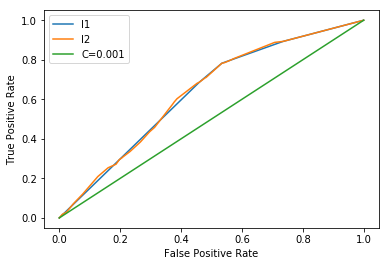

In [48]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=0.001' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [23]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [24]:
Y = data['affair']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [26]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1 ).fit( X_train, Y_train )

In [27]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [28]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

NameError: name 'roc_curve' is not defined

In [ ]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()